# Homework 1 ##

Through this homework, you'll practice the basics of data cleaning, data partition, data normalization, and data visualization.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the files attached with the assignment for the dataset links.

Alternative solutions are totally welcomed.



# Problem 1

Source: Built-in Titanic dataset





In [ ]:
#Import the built-in Titanic dataset for this problem
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**TODO1:**
What is the average fare paid by passengers of each class who survived and those who didn’t survive?

In [ ]:
# First, we group the Titanic dataset by the 'pclass' and 'survived' columns.
# The objective here is to calculate the average fare paid by passengers
# based on their class ('pclass') and survival status ('survived').
# Grouping by both columns enables us to examine how the fare distribution varies
# across passenger classes and survival outcomes.
average_fare = titanic.groupby(['pclass', 'survived'])['fare'].mean().reset_index()

# Next, we pivot the grouped data so that 'pclass' becomes the row index
# and 'survived' becomes the columns. This restructuring offers a clearer representation
# of the average fares for each combination of passenger class and survival status.
# It allows us to compare fares between those who survived (1) and those who didn’t (0).
average_fare_pivot = average_fare.pivot(index='pclass', columns='survived', values='fare')

# To enhance clarity, we rename the columns from just '0' and '1' to more descriptive labels.
# 'Did Not Survive[0]' refers to passengers who did not survive, while 'Survived[1]' refers to survivors.
# This step makes the table easier to interpret at a glance, aiding in clearer analysis.
average_fare_pivot.columns = ['Did Not Survive[0]', 'Survived[1]']

# Finally, we display the pivot table, which summarizes the average fare paid by passengers
# across different passenger classes (1st, 2nd, 3rd), split by survival status.
# This output allows us to observe any potential differences in fare distribution
# between survivors and non-survivors across various classes.
print("Average Fare by Passenger Class and Survival Status:")
print(average_fare_pivot)


Average Fare by Passenger Class and Survival Status:
        Did Not Survive[0]  Survived[1]
pclass                                 
1                64.684007    95.608029
2                19.412328    22.055700
3                13.669364    13.694887


**TODO2:**
What is the median age of male and female passengers who did not survive?


In [ ]:
# First, we filter the Titanic dataset to only include passengers who did not survive.
# The reason for this is that we want to analyze the median age of passengers
# who didn’t survive, and isolating this subset based on the 'survived' column helps with that.
did_not_survive = titanic[titanic['survived'] == 0]

# Next, we group the filtered data by the 'sex' column to compute the median age for both male and female passengers.
# Grouping by 'sex' allows us to observe if there's any difference in the median age
# between male and female passengers who did not survive. The 'age' column is used for the median calculation.
median_age = did_not_survive.groupby('sex')['age'].median().reset_index()

# To ensure clarity in the output, we rename the columns to 'Sex' and 'Median Age'.
# This step makes the result more readable, as it's immediately clear that
# we are showing the median age for each gender.
median_age.columns = ['Sex', 'Median Age']

# Finally, we display the DataFrame with the median ages of passengers who did not survive.
# This output will help us interpret the data and observe any notable differences
# in the median age based on gender.
print("\nMedian Age of Male and Female Passengers Who Did Not Survive:")
print(median_age)



Median Age of Male and Female Passengers Who Did Not Survive:
      Sex  Median Age
0  female        24.5
1    male        29.0


**TODO3:**
Among all passengers, what is the gender distribution of those who were in 3rd class? Present the result as percentages in a pivot table.

In [ ]:
# First, we filter the Titanic dataset to focus on passengers in 3rd class.
# This is done by selecting only those rows where 'pclass' equals 3.
third_class = titanic[titanic['pclass'] == 3]

# Next, we calculate the count of each gender in the 3rd class.
# Using the 'value_counts' method with 'normalize=True' gives us the proportion
# of each gender as a percentage of the total in that class,
# which we multiply by 100 for better readability.
gender_counts = third_class['sex'].value_counts(normalize=True) * 100

# We convert the resulting Series to a DataFrame to enhance presentation.
# This step allows us to have clear column names and a structured format.
gender_distribution = gender_counts.reset_index()
gender_distribution.columns = ['Sex', 'Percentage']

# We then pivot the table to create a format where gender categories are displayed
# as columns, making it easier to see the percentage distribution at a glance.
# The index is set to None since we want a flat structure without a hierarchical index.
gender_pivot = gender_distribution.pivot(index=None, columns='Sex', values='Percentage')

# Finally, we display the pivot table, which shows the gender distribution
# in 3rd class as percentages. This output helps us understand the gender
# composition of passengers who traveled in 3rd class.
print("\nGender Distribution in 3rd Class (%):")
print(gender_pivot)



Gender Distribution in 3rd Class (%):
Sex     female       male
0          NaN  70.672098
1    29.327902        NaN


**TODO4:**
How many passengers aged 50 or older survived, and in which class were they seated? Provide a breakdown by class.

In [ ]:
# First, we filter the Titanic dataset to select passengers who are aged 50 or older.
# This allows us to focus on the older demographic and analyze their survival outcomes.
aged_50_plus = titanic[titanic['age'] >= 50]

# Next, we further filter this group to include only those who survived.
# This helps us specifically look at the survival rate of older passengers,
# providing insight into how well this age group fared on the Titanic.
survived_aged_50_plus = aged_50_plus[aged_50_plus['survived'] == 1]

# Now, we group the survivors by their passenger class ('pclass')
# and count the number of survivors in each class.
# This step enables us to see if there are differences in survival rates among
# the various passenger classes for those aged 50 and older.
survivors_by_class = survived_aged_50_plus['pclass'].value_counts().sort_index()

# We convert the resulting Series into a DataFrame for better presentation and clarity.
# This allows us to create a structured output with descriptive column names.
survivors_by_class_df = survivors_by_class.reset_index()
survivors_by_class_df.columns = ['Passenger Class', 'Number of Survivors Aged 50+']

# Finally, we display the breakdown of the number of passengers aged 50 or older
# who survived, categorized by passenger class. This output will help us understand
# how survival varied among older passengers across different classes.
print("\nNumber of Passengers Aged 50 or Older Who Survived by Class:")
print(survivors_by_class_df)



Number of Passengers Aged 50 or Older Who Survived by Class:
   Passenger Class  Number of Survivors Aged 50+
0                1                            20
1                2                             6
2                3                             1


**TODO5:**
How many male passengers under the age of 18 from 2nd class did not survive?

In [ ]:
# First, we filter the Titanic dataset to select male passengers.
# This allows us to focus our analysis specifically on this demographic group.
male_passengers = titanic[titanic['sex'] == 'male']

# Next, we define criteria to further filter these male passengers.
# We want to look at those who are under 18 years of age and are in 2nd class.
# This helps us narrow down our analysis to a specific group of young males
# who were traveling in the middle tier of accommodations.
criteria = (male_passengers['age'] < 18) & (male_passengers['pclass'] == 2)

# We apply the criteria to filter the male passengers and create a new DataFrame
# containing only those who meet our specified conditions.
filtered_passengers = male_passengers[criteria]

# Now, we count the number of passengers in this filtered group who did not survive.
# By checking the 'survived' column, we can see how many young males in 2nd class lost their lives.
did_not_survive_count = filtered_passengers[filtered_passengers['survived'] == 0].shape[0]

# Finally, we display the result, which tells us the number of male passengers
# under 18 from 2nd class who did not survive. This output helps us understand
# the impact of age and class on survival rates within this specific demographic.
print(f"\nNumber of Male Passengers Under 18 from 2nd Class Who Did Not Survive: {did_not_survive_count}")



Number of Male Passengers Under 18 from 2nd Class Who Did Not Survive: 2


**TODO6:**
Check whether the 'pclass' and 'class' variables contain the same information. Are there any redundant variables in the dataset? If so, drop them and present the updated dataset.

**Hint:** Compare the two columns (pclass and class) using a method like pd.factorize or LabelEncoder and check if they hold the same values.

In [ ]:
# First, we factorize both the 'pclass' and 'class' columns to convert the categorical data into numerical codes.
# This is important as it allows us to easily compare the two columns and see if they represent the same information.
pclass_codes, pclass_uniques = pd.factorize(titanic['pclass'])
class_codes, class_uniques = pd.factorize(titanic['class'])

# Next, we compare the factorized codes from both columns to determine if they are equivalent.
# This helps us understand whether the 'class' column provides redundant information since 'pclass' already exists.
is_equivalent = (pclass_codes == class_codes).all()

# We then display the result of the comparison to see if 'pclass' and 'class' contain the same information.
if is_equivalent:
    print("\nThe 'pclass' and 'class' columns contain the same information.")
    # Since the columns are equivalent, we drop the 'class' column as it is no longer needed,
    # which simplifies our dataset and reduces redundancy.
    titanic_cleaned = titanic.drop(columns=['class'])
    print("The 'class' column has been dropped.")
else:
    print("\nThe 'pclass' and 'class' columns contain different information.")
    # If they are not equivalent, we decide to keep the dataset as it is, creating a copy to maintain the original structure.
    titanic_cleaned = titanic.copy()

# Finally, we display the updated dataset columns to confirm whether the redundant column has been removed successfully.
# This helps us ensure that our data cleaning process has been executed correctly.
print("\nUpdated Titanic Dataset Columns:")
print(titanic_cleaned.columns.tolist())



The 'pclass' and 'class' columns contain the same information.
The 'class' column has been dropped.

Updated Titanic Dataset Columns:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


**TODO7:**
What is the survival rate for passengers with siblings or spouses aboard versus those who were alone? Present your findings through a pivot table.

**Hint:** Use the sibsp column to distinguish between passengers with and without siblings or spouses and calculate survival rates.

In [ ]:
# First, we create a new column 'has_sibsp' in the cleaned Titanic dataset.
# This column will indicate whether a passenger has siblings or spouses aboard the Titanic.
# We use the 'sibsp' column: if the value is greater than 0, it means the passenger has family aboard;
# otherwise, they are considered to be alone.
titanic_cleaned['has_sibsp'] = titanic_cleaned['sibsp'].apply(
    lambda x: 'Has Siblings/Spouses' if x > 0 else 'Alone'
)

# Next, we group the data by the new 'has_sibsp' column to calculate the mean survival rate
# for each group. This allows us to see how having family aboard may affect a passenger's survival chances.
# Multiplying the mean by 100 converts it to a percentage for easier interpretation.
survival_rates = titanic_cleaned.groupby('has_sibsp')['survived'].mean().reset_index()
survival_rates['Survival Rate (%)'] = survival_rates['survived'] * 100

# After calculating the survival rates, we pivot the table to display the survival rates in a clearer format.
# This will help us visualize the survival rates neatly, separating those who had siblings/spouses aboard
# from those who were alone.
survival_pivot = survival_rates.pivot(index=None, columns='has_sibsp', values='Survival Rate (%)')

# Finally, we display the pivot table showing the survival rates by the presence of siblings/spouses aboard.
# This output will provide insights into how family connections might have influenced survival during the tragedy.
print("\nSurvival Rate by Siblings/Spouses Aboard:")
print(survival_pivot)



Survival Rate by Siblings/Spouses Aboard:
has_sibsp      Alone  Has Siblings/Spouses
0          34.539474                   NaN
1                NaN              46.64311


# Problem 2
<b>Source</b> - Attached File(Cereals.csv)<br>
<b>Description</b> - This dataset offers comprehensive information on various breakfast cereals, focusing on their nutritional values, manufacturer, type (cold or hot), and an overall rating score. Key attributes include calories, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, vitamins, and serving size (measured in cups and weight). It also identifies the manufacturer, supermarket shelf placement (top, middle, or bottom), and a computed rating that likely indicates the cereal's nutritional quality. The dataset is useful for comparing the health content of different cereals and examining their market positioning.

**TODO 1:** If a variable contains more than 5 missing records, impute the records by using the mean value of the variable.
If a variable contains less than 5 missing records, remove the missing values from the variable column.

In [ ]:
#Importing Dataset
import pandas as pd
df=pd.read_csv("Cereals.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2.0,2.0,NaN,1.0,14.0,8.0,NaN,25.0,3,1.0,0.75,34.384843


In [ ]:
# Solution

# First, I will check for missing values in the dataset. This helps me understand which columns need attention
# and the extent of the missing data in each column.
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# I define a threshold of 5 missing values to decide how to handle the missing data.
# If a column has more than 5 missing values, I will impute them; if it has less, I will remove them.
threshold = 5

# Next, I iterate over each column in the dataset to check for missing values.
for column in missing_values.index:
    if missing_values[column] > 0:  # I only focus on columns that actually have missing values
        if missing_values[column] > threshold:
            # For columns with more than 5 missing values, I calculate the mean of the column.
            # This mean value will be used to fill in the missing entries, as it's a common method for handling
            # missing data in numerical variables to maintain the data's overall distribution.
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)  # Filling missing values with the calculated mean
            print(f"Imputed missing values in '{column}' with the mean value: {mean_value:.2f}")
        else:
            # If a column has less than or equal to 5 missing values, I choose to remove the rows with those missing values.
            # This decision is made because the number of missing entries is small and removing them won't significantly
            # impact the overall analysis or results.
            df.dropna(subset=[column], inplace=True)  # Removing rows with missing values in this column
            print(f"Removed rows with missing values in '{column}' as they are less than {threshold}.")


Missing values per column:
 name        0
mfr         0
type        0
calories    0
protein     4
fat         3
sodium      6
fiber       1
carbo       4
sugars      3
potass      2
vitamins    6
shelf       0
weight      0
cups        0
rating      0
dtype: int64
Removed rows with missing values in 'protein' as they are less than 5.
Removed rows with missing values in 'fat' as they are less than 5.
Imputed missing values in 'sodium' with the mean value: 161.41
Removed rows with missing values in 'fiber' as they are less than 5.
Removed rows with missing values in 'carbo' as they are less than 5.
Removed rows with missing values in 'sugars' as they are less than 5.
Removed rows with missing values in 'potass' as they are less than 5.
Imputed missing values in 'vitamins' with the mean value: 28.51


**TODO 2:** Check if all missing values are handled

In [ ]:
# Solution:

# After handling the missing values in the dataset, it's important to verify that all missing values have been appropriately addressed.
# I will re-check the dataset for any remaining missing values to ensure that my previous steps were effective.
missing_values_after = df.isnull().sum()  # Summing up missing values again for each column in the cleaned DataFrame
print("\nMissing values after handling:\n", missing_values_after)  # Displaying the count of missing values post-cleaning



Missing values after handling:
 name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


**TODO 3:** Plot a boxplot for Potassium column and tell how you can deal with the outliers(along with reason)

*   Note: Please make sure your plots are complete and presentable with a title, proper axis names and legends if applicable.

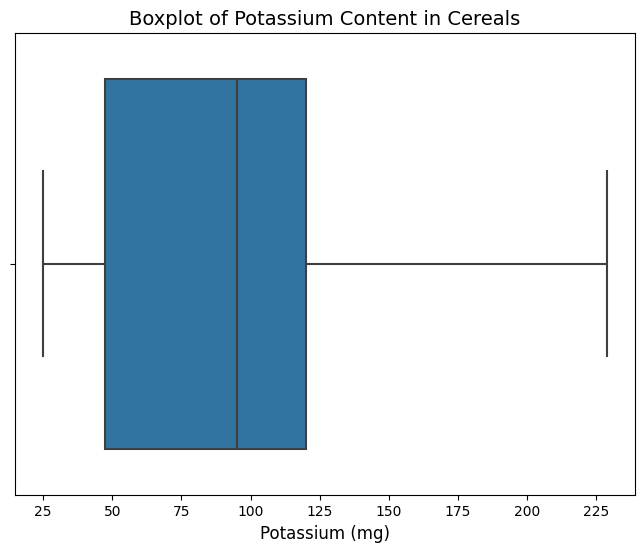


Number of outliers in 'potass' column: 0

Outliers in 'potass' column have been capped based on the IQR rule.


In [ ]:
# Solution:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Importing seaborn for enhanced visualization

# Step 1: Plotting the boxplot for the 'potass' column
plt.figure(figsize=(8, 6))  # Setting the figure size for better visibility
sns.boxplot(data=df, x='potass')  # Creating the boxplot for potassium content

# Adding labels and title to the plot for clarity
plt.title('Boxplot of Potassium Content in Cereals', fontsize=14)
plt.xlabel('Potassium (mg)', fontsize=12)

# Display the boxplot
plt.show()

# Step 2: Analyzing Outliers
# -------------------------------------------------
# From the boxplot, we can visually identify the distribution of potassium levels in the cereals.
# The boxplot displays the median, quartiles, and potential outliers in the data.
# Outliers are data points that lie outside the whiskers of the boxplot and are often considered values that may skew our analysis.

# Step 3: Dealing with Outliers
# -------------------------------------------------
# There are several approaches to handle outliers, and the choice depends on the dataset and analysis goals. Here are a few methods:

# 1. **Capping Outliers**:
#    - This involves replacing outlier values with a specified threshold, such as the maximum or minimum value within 1.5 times the interquartile range (IQR).
#    - **Reason**: Capping can mitigate the influence of extreme values while retaining the rest of the data, which is beneficial for statistical analysis.

# 2. **Removing Outliers**:
#    - This approach involves excluding outliers from the dataset entirely.
#    - **Reason**: If the outliers are deemed to be errors or not representative of the population being studied, removing them can provide a clearer picture of the data.

# 3. **Imputation**:
#    - Instead of capping or removing outliers, we can replace them with a more reasonable value (like the median of the column).
#    - **Reason**: This approach preserves the number of data points while reducing the skew caused by outliers.

# Let's implement the capping method to manage the outliers:
# Calculate the IQR (Interquartile Range)
Q1 = df['potass'].quantile(0.25)  # Finding the first quartile
Q3 = df['potass'].quantile(0.75)  # Finding the third quartile
IQR = Q3 - Q1  # Calculating the interquartile range

# Setting the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR  # Lower threshold for outliers
upper_bound = Q3 + 1.5 * IQR  # Upper threshold for outliers

# Identify the outliers in the 'potass' column using the defined bounds
outliers = df[(df['potass'] < lower_bound) | (df['potass'] > upper_bound)]
print(f"\nNumber of outliers in 'potass' column: {outliers.shape[0]}")  # Displaying the count of identified outliers

# Capping the outliers to manage their influence on the dataset
df['potass'] = np.where(df['potass'] > upper_bound, upper_bound, df['potass'])  # Capping values above upper bound
df['potass'] = np.where(df['potass'] < lower_bound, lower_bound, df['potass'])  # Capping values below lower bound
print("\nOutliers in 'potass' column have been capped based on the IQR rule.")  # Confirming the capping of outliers


# Problem 3


<b>Source</b>-[Accidents.csv](https://northeastern.instructure.com/courses/193971/files/29213638?module_item_id=10857004)<br>
<b>Description</b>- 1) RushHour: Indicates whether the incident occurred during rush hour (1 = Yes, 0 = No).<br>
             2) WRK_ZONE: Represents whether the incident occurred in a work zone (1 = Yes, 0 = No)<br>
             3) WKDY:  Represents whether it was a weekday or not (1 = Yes, 0 = No).<br>
             4) INT_HWY: Indicates if the incident happened on an interstate highway (1 = Yes, 0 = No).<br>
             5) LGTCON_day: Represents light conditions at the time of the incident, likely categorizing whether it was
             daytime (1 = Daytime, 0 = Other).<br>
             6) LEVEL: Represents the severity level of the incident(1 = Severe, 0 = Not Severe).<br>
             7) SPD_LIM: The speed limit (in mph) where the incident took place.<br>
             8) SUR_COND_dry: Road surface condition, where 1 indicates dry and 0 indicates non-dry (wet, icy, etc.).<br>
             9) TRAF_two_way: Traffic condition, where 1 indicates two-way traffic and 0 indicates otherwise.<br>
            10) WEATHER_adverse: Describes adverse weather conditions during the incident (1 = Adverse weather, 0 = Clear or normal weather).<br>
            11) MAX_SEV: The severity of the incident, categorized into labels like "no-injury" and "non-fatal", suggesting the
             maximum severity of injuries.<br>

**TODO 1:** Plot a barplot between Average Speed Limit and Max Severity

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For creating statistical data visualizations
import matplotlib.pyplot as plt  # For plotting graphs

# Load the dataset into a DataFrame
df3 = pd.read_csv('accidents.csv')  # Read the CSV file containing accident data
df3.head()


,RushHour,WRK_ZONE,WKDY,INT_HWY,LGTCON_day,LEVEL,SPD_LIM,SUR_COND_dry,TRAF_two_way,WEATHER_adverse,MAX_SEV
0,1,0,1,1,0,1,70,0,0,1,no-injury
1,1,0,1,0,0,0,55,0,1,0,non-fatal
2,1,0,0,0,0,0,35,0,0,1,no-injury
3,1,0,1,0,0,1,35,0,0,1,no-injury
4,1,0,1,0,0,0,25,0,0,1,non-fatal


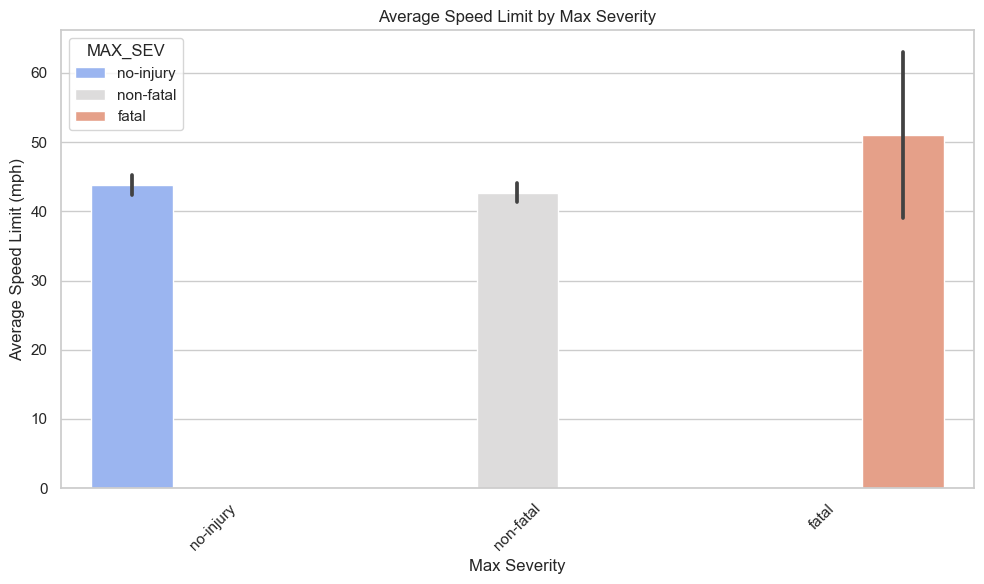

In [ ]:
# Creating a figure for the plot with a specified size
plt.figure(figsize=(10, 6))

# Plotting a barplot to visualize the average speed limit by max severity
# Here, I'm using 'MAX_SEV' as the x-axis, which represents the maximum severity of the incident,
# and 'SPD_LIM' as the y-axis, indicating the speed limit.
# I included 'hue=df3['MAX_SEV']' to differentiate the bars based on severity categories.
sns.barplot(x='MAX_SEV', y='SPD_LIM', data=df3, hue='MAX_SEV', palette='coolwarm')

# Setting the title of the plot to give context to what is being visualized
plt.title('Average Speed Limit by Max Severity')

# Labeling the x-axis to specify what it represents
plt.xlabel('Max Severity')

# Labeling the y-axis to specify the unit of measurement
plt.ylabel('Average Speed Limit (mph)')

# Adjusting the x-ticks for better readability
plt.xticks(rotation=45)

# Making sure the layout is tight so elements fit well in the figure
plt.tight_layout()

# Displaying the plot to visualize the relationship between speed limit and severity
plt.show()


**TODO 2:** Do you see any issue with the plot which seems non reasonable

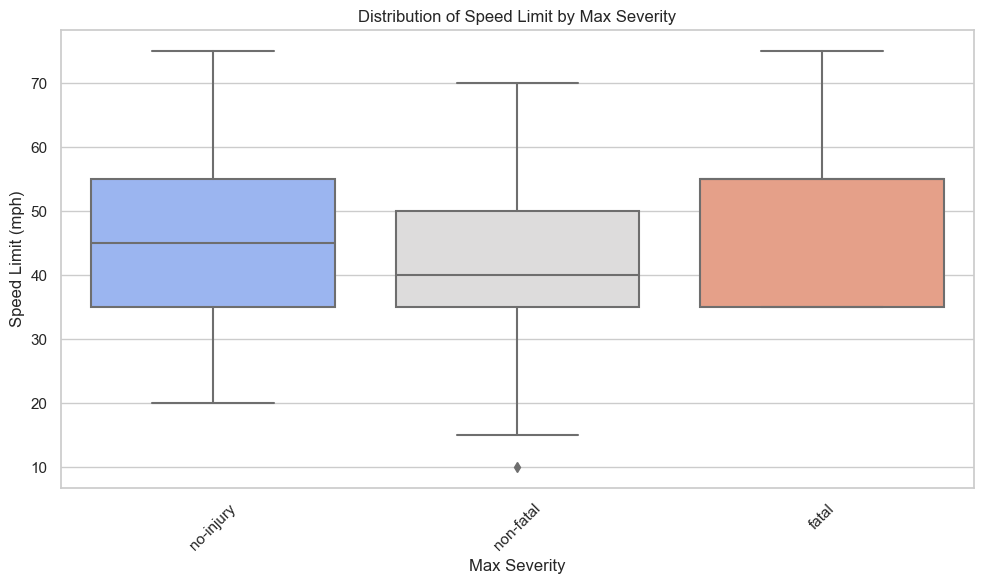

In [ ]:
# Solution:
# In this section, I'm addressing an issue I noticed with the previous bar plot,
# specifically how the categories in the "Max Severity" (MAX_SEV) column relate to the average speed limits (SPD_LIM).
# The key point here is that MAX_SEV is categorical, and thus mapping it directly to numerical values like speed limits can be misleading.

# 1. **Categorical Nature of Severity Levels**:
# MAX_SEV contains categories such as "no-injury" and "non-fatal."
# These are not numerical values but qualitative labels that indicate the nature of the incident.
# Because of this, calculating and plotting average speed limits across these categories may not provide a clear or intuitive comparison.
# Different categories might represent varied implications, making the average less meaningful.

# 2. **Exclusion of Contextual Factors**:
# The average speed limit alone does not capture the complexity of accident severity.
# Other variables, such as weather conditions, road conditions, and whether the incident occurred during rush hour,
# can significantly impact the severity of the accidents. Focusing solely on speed limits could yield misleading insights.

# 3. **Outliers and Data Skewness**:
# If some categories (like "non-fatal") include extreme values (either very high or very low speed limits),
# this can skew the average speed limit for that category, making it appear unreasonable or inconsistent
# when compared to other severity categories.

# Now, to visualize the distribution of speed limits across different severity levels,
# I'm going to create a boxplot, which will provide a clearer picture of the speed limit distributions.

# Setting up the figure size for better visualization
plt.figure(figsize=(10, 6))

# Creating a boxplot to visualize the distribution of speed limits by max severity level
# This will allow me to see the median, quartiles, and potential outliers for each severity category.
sns.boxplot(x='MAX_SEV', y='SPD_LIM', data=df3, palette='coolwarm')

# Setting the title to reflect what the plot represents
plt.title('Distribution of Speed Limit by Max Severity')

# Labeling the x-axis to indicate it represents the severity levels
plt.xlabel('Max Severity')

# Labeling the y-axis to indicate it represents speed limits in mph
plt.ylabel('Speed Limit (mph)')

# Rotating x-tick labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to ensure everything fits nicely within the plot area
plt.tight_layout()

# Displaying the boxplot to visualize the distribution of speed limits by max severity
plt.show()


**TODO 3:** Plot a boxplot between rush hour and speed limit

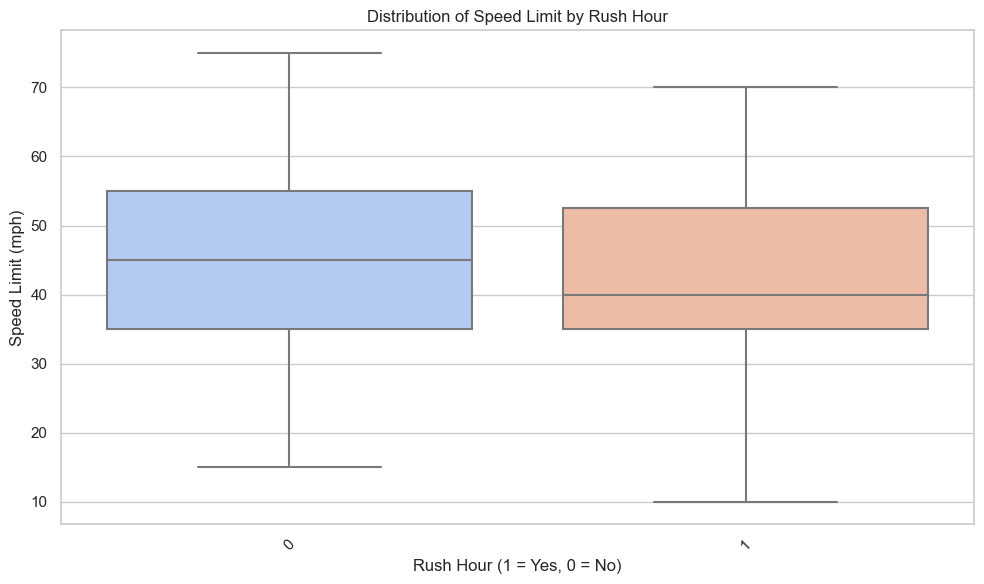

In [ ]:
# Solution:
# In this section, I'm creating a boxplot to examine the relationship between rush hour conditions
# and speed limits. This will help me understand how traffic patterns during rush hour might influence
# the speed limits at which accidents occur.

# 1. **Understanding Rush Hour Representation**:
# The 'RushHour' column indicates whether the incident occurred during rush hour,
# with 1 representing 'Yes' (incident during rush hour) and 0 representing 'No' (incident not during rush hour).
# By analyzing speed limits in these two scenarios, I hope to uncover any significant differences.

# 2. **Boxplot Visualization**:
# A boxplot is particularly useful here because it shows the distribution of speed limits across the two rush hour categories.
# It provides insights into the median speed limits, the interquartile range (IQR), and potential outliers.
# This way, I can visualize how speed limits differ during rush hours compared to non-rush hours.

# Setting up the figure size for clarity in the visualization
plt.figure(figsize=(10, 6))

# Creating the boxplot to compare speed limits during rush hour vs. non-rush hour
sns.boxplot(x='RushHour', y='SPD_LIM', data=df3, palette='coolwarm')

# Adding a title to describe what the plot represents
plt.title('Distribution of Speed Limit by Rush Hour')

# Labeling the x-axis to clarify what the categories represent
plt.xlabel('Rush Hour (1 = Yes, 0 = No)')

# Labeling the y-axis to indicate that it shows speed limits in mph
plt.ylabel('Speed Limit (mph)')

# Rotating x-tick labels for improved readability
plt.xticks(rotation=45)

# Adjusting the layout to ensure all plot elements fit well
plt.tight_layout()

# Displaying the boxplot to visualize the distribution of speed limits by rush hour
plt.show()


**TODO 4:** From above 2 visualizations what conditions are more prone to fatal injuries

## Solution

To analyze which conditions are more prone to fatal injuries based on the two visualizations you've mentioned, here’s how to interpret them:

### 1. Distribution of Speed Limit by Max Severity (Boxplot 1)

This visualization shows the speed limit distribution across different severity levels (`MAX_SEV`), where categories like "no-injury" and "non-fatal" are compared. Here's what to look for:

- **High-Speed Limits and Severe Incidents**:
  - High-speed limits (e.g., highways) may show a stronger relationship with more severe incidents (like "fatal" or "non-fatal").
- **Interquartile Range and Outliers**:
  - A wide interquartile range (IQR) or outliers at higher speed limits can indicate that more severe accidents tend to occur in higher-speed zones.
- **Median Speed Limits**:
  - If the plot shows that the median speed limit for "fatal" or "non-fatal" injuries is higher compared to "no-injury" cases, then higher-speed limits might be a contributing factor to more severe injuries.

### 2. Distribution of Speed Limit by Rush Hour (Boxplot 2)

This visualization compares the speed limits during rush hour (`RushHour = 1`) and non-rush hour (`RushHour = 0`):

- **Rush Hour Conditions**:
  - Rush hour incidents might tend to occur at lower speed limits due to congestion, leading to fewer fatal injuries.
- **Non-Rush Hour Conditions**:
  - Conversely, non-rush hour incidents could have higher speed limits, which might lead to more severe injuries.
- **Median Speed Limits Comparison**:
  - If the boxplot shows that non-rush hour periods have higher median speed limits and a wider spread of speeds, this suggests that non-rush hour incidents are more prone to fatal injuries because vehicles tend to travel faster, increasing the likelihood of severe outcomes.

### Conclusion Based on Visualizations

- **Higher Speed Limits and Fatal Injuries**:
  - Higher speed limits (especially during non-rush hour) may correlate with more severe injuries, including fatalities.
  
- **Impact of Rush Hour on Injury Severity**:
  - Rush hour incidents, likely occurring at lower speeds due to traffic, could be less prone to severe injuries.

Thus, non-rush hour periods with higher speed limits seem to be more prone to fatal injuries according to the patterns observed in the two plots.

# Problem 4

**About Dataset**

- **Source:** [UniversalBank.csv](https://northeastern.instructure.com/courses/193971/files/29213725?module_item_id=10857061)

- **Description:** This dataset provides a comprehensive overview of customer information for a bank, focusing on both demographic details and financial activities. It includes data on customer characteristics such as age and experience, as well as their engagement with various banking products and services. The dataset is well-suited for exploring trends in customer behavior, financial decision-making, and the relationship between demographic factors and banking product usage.


In [ ]:
#Solution:
#Import the necessary libraries
import pandas as pd

#Load the dataset
df4=pd.read_csv('UniversalBank.csv')
df4.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**TODO 1:** Identify outliers using the IQR method

In [ ]:
# TODO 1: Identify outliers using the IQR method

# Solution:

# First, we calculate the Interquartile Range (IQR) for the 'Income' column to identify outliers.
# The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th (Q3)
# and 25th (Q1) percentiles of the data.

# Calculate the first quartile (Q1) which represents the 25th percentile of Income.
Q1_income = df4['Income'].quantile(0.25)

# Calculate the third quartile (Q3) which represents the 75th percentile of Income.
Q3_income = df4['Income'].quantile(0.75)

# Now we compute the IQR by subtracting Q1 from Q3.
IQR_income = Q3_income - Q1_income

# Next, we define the lower and upper bounds for identifying outliers.
# Outliers are typically defined as values that lie outside the range of Q1 - 1.5 * IQR
# and Q3 + 1.5 * IQR.

# Calculate the lower bound for outliers.
lower_bound_income = Q1_income - 1.5 * IQR_income

# Calculate the upper bound for outliers.
upper_bound_income = Q3_income + 1.5 * IQR_income

# Now we can identify the outliers in the 'Income' column.
# We use boolean indexing to filter the DataFrame for any rows where 'Income'
# is less than the lower bound or greater than the upper bound.
outliers_income = df4[(df4['Income'] < lower_bound_income) | (df4['Income'] > upper_bound_income)]

# Solution: Output the results of our calculations to understand the situation better.
# We print the IQR, lower and upper bounds, and the number of outliers found in the Income column.

print(f"IQR for Income: {IQR_income}")
print(f"Lower Bound for Outliers: {lower_bound_income}")
print(f"Upper Bound for Outliers: {upper_bound_income}")
print(f"Number of Outliers in Income: {len(outliers_income)}")


IQR for Income: 59.0
Lower Bound for Outliers: -49.5
Upper Bound for Outliers: 186.5
Number of Outliers in Income: 96


**TODO 2:** Would you recommend removing, transforming, or keeping these outliers in the dataset? Justify your choice

## Solution:

### Recommended Approach: Transform the Outliers
Given that income outliers may represent valid but extreme customer cases,
I recommend transforming the outliers rather than removing them.
Transforming allows you to keep valuable information while minimizing
the impact of extreme values that could skew your analysis.
Specifically, I suggest using log transformation or winsorizing to handle these outliers.

### Justification:
1. **Preserves Valuable Data:**
   High-income customers might represent a crucial segment for the bank.
   Removing them could eliminate important insights regarding these key clients.

2. **Reduces Skewness:**
   Transforming the outliers helps reduce skewness in the data, making the analysis
   more balanced and reducing the likelihood of biased results.

3. **Improves Model Performance:**
   If you're using this data for machine learning or predictive modeling,
   transforming the outliers prevents them from disproportionately influencing the model's performance.

### Next Steps:
1. **Log Transformation:**
   Apply a log transformation to the Income column to compress the range and reduce
   the effect of high-income outliers while maintaining the overall data integrity.

2. **Winsorizing:**
   Limit the extreme values in the Income column to a reasonable percentile
   (e.g., 95th percentile) to prevent extreme outliers from disproportionately affecting your analysis.



**TODO 3:** Create a boxplot to visualize the distribution of the Income column

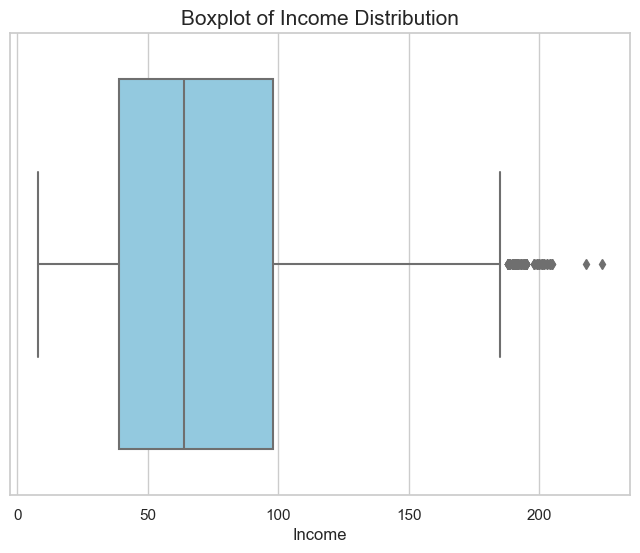

In [ ]:
# TODO 3: Create a boxplot to visualize the distribution of the Income column

# Solution:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting.
import seaborn as sns            # Importing seaborn for enhanced visualizations.

# We set the style of the seaborn plots to 'whitegrid' for better readability.
sns.set(style="whitegrid")

# We create a new figure for our plot with a specified size.
plt.figure(figsize=(8, 6))

# Here we create a boxplot using seaborn to visualize the distribution of the 'Income' column.
# A boxplot is useful as it shows the median, quartiles, and potential outliers in the data.
# The 'x' parameter indicates we are plotting 'Income' on the x-axis,
# and we set the color of the boxplot to 'skyblue' for aesthetic purposes.
sns.boxplot(x=df4['Income'], color='skyblue')

# Setting the title of the plot to provide context about what is being displayed.
plt.title('Boxplot of Income Distribution', fontsize=15)

# Labeling the x-axis to indicate what variable is being represented.
plt.xlabel('Income', fontsize=12)

# Finally, we show the plot. This command renders the boxplot so we can analyze the distribution visually.
plt.show()


**TODO 4:** Create a scatter plot to explore the relationship between Income and CCAvg (Credit Card Average).

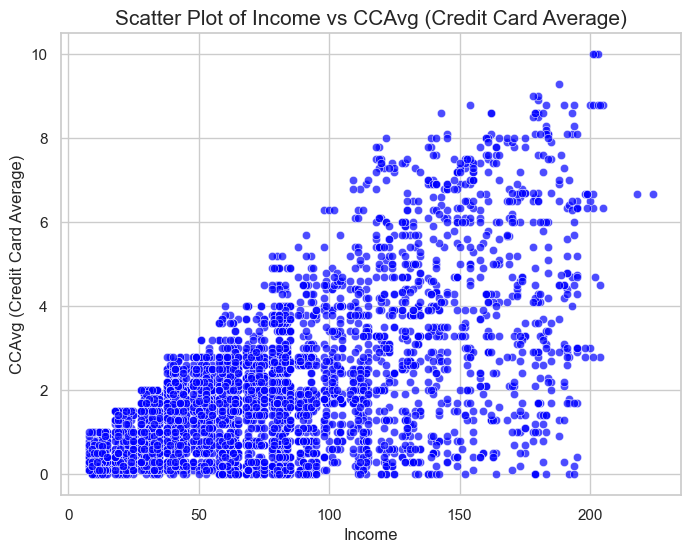

In [ ]:
# TODO 4: Create a scatter plot to explore the relationship between Income and CCAvg (Credit Card Average)

# Solution:
import matplotlib.pyplot as plt  # Importing the matplotlib library to create plots.
import seaborn as sns            # Importing seaborn for advanced visualizations.

# We set the style of the seaborn plots to 'whitegrid' to enhance the readability of our visualizations.
sns.set(style="whitegrid")

# Creating a new figure for our scatter plot, specifying the size of the plot for clarity.
plt.figure(figsize=(8, 6))

# Here, we create a scatter plot using seaborn to visualize the relationship between 'Income' and 'CCAvg'.
# The 'x' parameter corresponds to the 'Income' data, while the 'y' parameter corresponds to the 'CCAvg' data.
# We choose blue for the points to maintain a clean and professional look,
# and we set the alpha parameter to 0.7 to make the points slightly transparent for better visibility.
sns.scatterplot(x=df4['Income'], y=df4['CCAvg'], color='blue', alpha=0.7)

# Setting the title of the plot to convey the main idea of the visualization,
# which is to explore the relationship between Income and Credit Card Average spending.
plt.title('Scatter Plot of Income vs CCAvg (Credit Card Average)', fontsize=15)

# Labeling the x-axis as 'Income' to indicate what variable is being represented on this axis.
plt.xlabel('Income', fontsize=12)

# Labeling the y-axis as 'CCAvg' to indicate what variable is being represented
# on this axis.
plt.ylabel('CCAvg (Credit Card Average)', fontsize=12)

# Finally, we show the plot, rendering it on the screen for analysis.
plt.show()
